In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import mplfinance as mplf
import numpy as np
import pandas as pd

import bars
import d
import microstructure

In [3]:
plt.rcParams["figure.figsize"] = (20, 8)
data = d.fetch("data/future/daily", "ES.csv")
data["log_close"] = np.log(data["Close"])

# Amihuds Lambda Estimate

<AxesSubplot:xlabel='Date'>

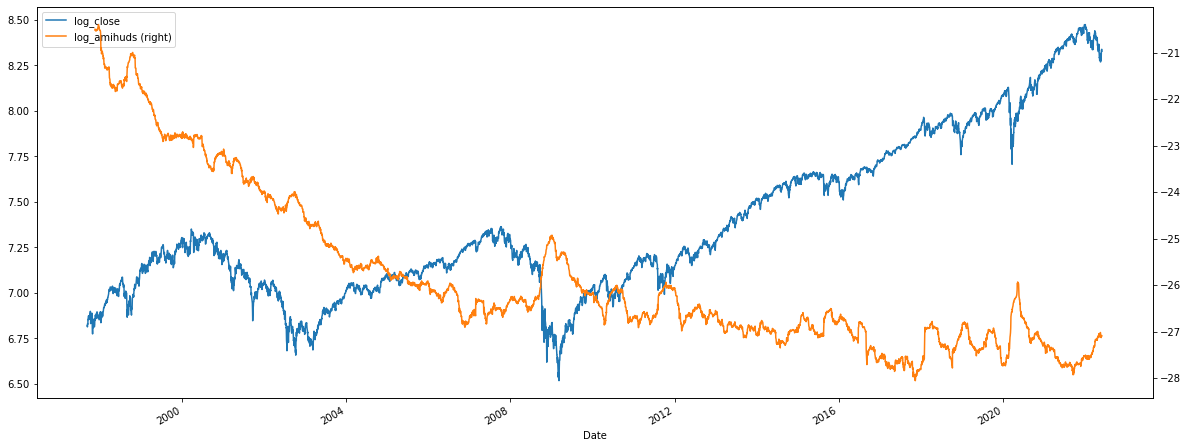

In [40]:
rolling_window = 50

data["amihuds"], data["t_stat"] = microstructure.amihuds_lambda_estimator(
    data, rolling_window=rolling_window, use_close_close=False, with_t_value=True
)
data["log_amihuds"] = np.log(data["amihuds"])
data[["log_close", "log_amihuds"]].plot(secondary_y="log_amihuds")

<AxesSubplot:ylabel='Frequency'>

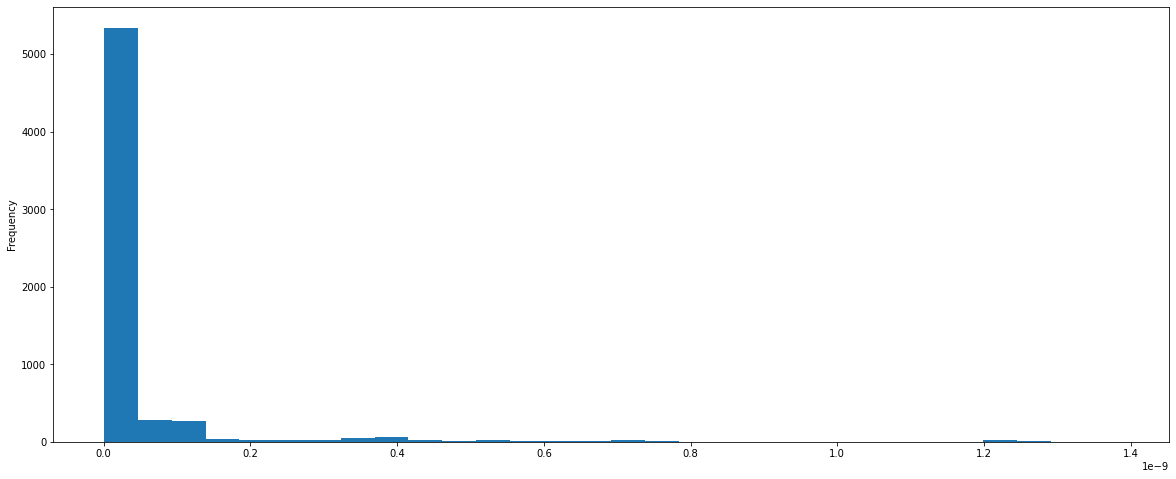

In [42]:
data["amihuds"].plot.hist(bins=30)

<AxesSubplot:xlabel='Date'>

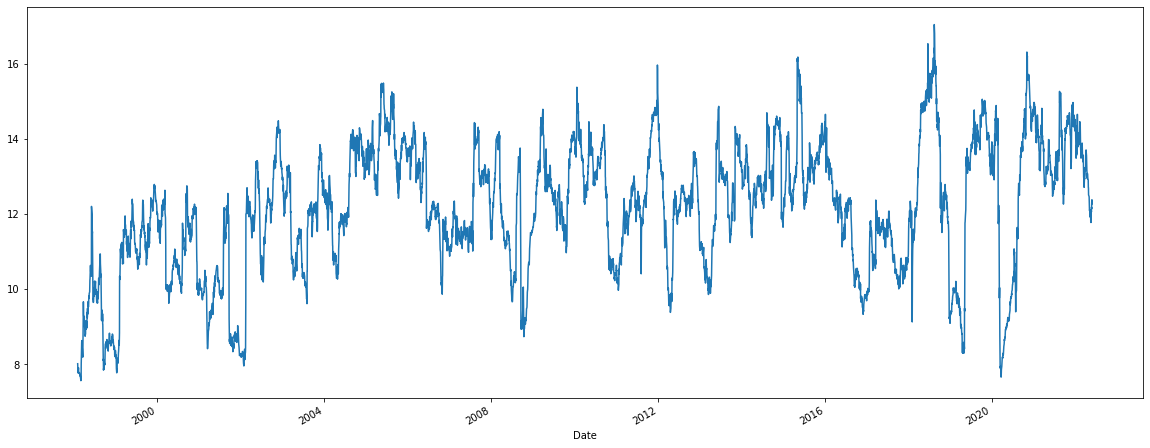

In [32]:
data["t_stat"].plot()